# Lab 3: Find SVM parameters by SGD/QP
*Author: Dr. Yiru Zhang*

*Computer Science Departement*

*Ecole Supérieure d'Ingénieur Léonard-de-Vinci*

In this lab session, you will implement SVM, a classification algorithm. Even though many well maintained toolboxes exist (such as scikit learn), you must implement this algorithms from scratch, for a better comprehension of the mathematical behind. You will build the following competences:
1. A better understanding of algorithms SVM.
2. Implementation of SGD as an optimization process.
3. Use `qpsolvers` for quadratic programming solution

This work should be done by group of **TWO students (maximum)**.
Please submit GMM (Lab Session 2) and SVM together as one submission.

## Working on generated data
We create two sets of 80 seperable points `X1` and `X2`, then implement a linear SVM model to classify it. The first set is linarly separable, while the second is not.


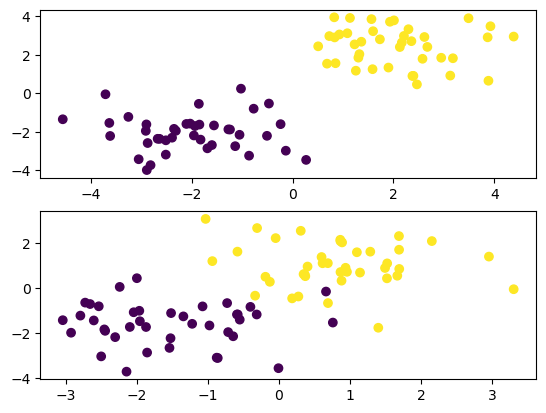

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
X1 = np.r_[np.random.randn(40, 2) - [2, 2], np.random.randn(40, 2) + [2, 2]]
X2 = np.r_[np.random.randn(40, 2) - [1.5, 1.5], np.random.randn(40, 2) + [1, 1]]
Y = [-1] * 40 + [1] * 40
#print(X.shape)
fig, axe = plt.subplots(2)
axe[0].scatter(X1[:, 0], X1[:, 1], c=Y)
axe[1].scatter(X2[:, 0], X2[:, 1], c=Y)
plt.show()

In [233]:
X1

array([[-0.23594765, -1.59984279],
       [-1.02126202,  0.2408932 ],
       [-0.13244201, -2.97727788],
       [-1.04991158, -2.15135721],
       [-2.10321885, -1.5894015 ],
       [-1.85595643, -0.54572649],
       [-1.23896227, -1.87832498],
       [-1.55613677, -1.66632567],
       [-0.50592093, -2.20515826],
       [-1.6869323 , -2.85409574],
       [-4.55298982, -1.3463814 ],
       [-1.1355638 , -2.74216502],
       [ 0.26975462, -3.45436567],
       [-1.95424148, -2.18718385],
       [-0.46722079, -0.53064123],
       [-1.84505257, -1.62183748],
       [-2.88778575, -3.98079647],
       [-2.34791215, -1.84365103],
       [-0.76970932, -0.79762015],
       [-2.38732682, -2.30230275],
       [-3.04855297, -3.42001794],
       [-3.70627019, -0.0492246 ],
       [-2.50965218, -2.4380743 ],
       [-3.25279536, -1.22250964],
       [-3.61389785, -2.21274028],
       [-2.89546656, -1.6130975 ],
       [-2.51080514, -3.18063218],
       [-2.02818223, -1.57166813],
       [-1.93348278,

In [234]:
Y

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### A. Find parameters by Stochastic Gradient Descent
Given the training data, one general solution is mimizing loss function by gradient descent method.

Recall that a linear Soft SVM is defined as:
$$
\min_{\mathbf{w}, b} \quad \frac{1}{2} {||\mathbf{w}||}^2 +C\sum_{n=1}^N \max \{0,1- y(\mathbf{w}^T\mathbf{x} + b) \} := L
$$
where $\frac{1}{2}||\mathbf{w}||^2$ refers to L2-regularizer and C a regularization parameter (See Slide 18 in Lecture 9)

1. Implement the loss function

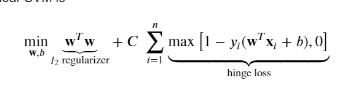

In [2]:
# Implement hinge loss function L
def loss(X,Y,C,w,b):
    regularizer = 0.5 * np.dot(w, w)
    liste_somme = []
    N = X.shape[0]
    
    #Calcul de la somme
    for i in range(N):
        valeur = 1 - Y[i]*(w.T*X[i,:]+b)
        liste_somme.append(valeur)
    somme = 0
    for i in range(N):
        if liste_somme[i]>0:
            somme += liste_somme[i]
            
    error_term = C*somme # you may need two conditions.
    loss = regularizer + error_term
    return loss

2. Implement the gradient
By defining the hinge loss, original optimization problem is converted to a new optimization problem without constraint. Therefore, Gradient descent algorithm can be directly applied to solve it.

#### Answer the following questions, then implement

What is the gradient of the Soft SVM loss function $\nabla L$? Give your answer of $\nabla_wL$ and $\nabla_bL$
(The derivatives are conditional, imposed by $\max \{0,1- y(\mathbf{w}^T\mathbf{x} + b) \}$)


#### Your answer here

$$
\nabla_wL= 
$$
$$
\nabla_bL=
$$

Then implement:


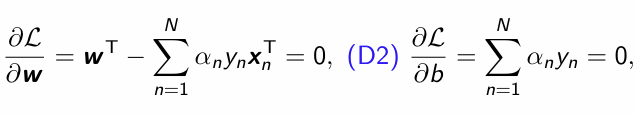

avec alpha n = C si $\{1- y(\mathbf{w}^T\mathbf{x} + b)\}$ <= 0 

sinon alpha n = 0

In [3]:
# Implement the method corresponding to your answer
def derivative_loss(xi, yi, C, w, b):
    """
    Parameters:
    ------------
    xi: (d) array, a data sample
    yi: int, lable of xi
    C: float, slackness for error term
    w:
    b:

    Return:
    -------------
    d_w:
    d_b:
    """
    
    d_w = w.T
    d_b = 0
    
    if 1 - yi * (np.dot(w.T,xi) + b) > 0:
        d_w += -C*yi*xi
        d_b = -C*yi
    
    return d_w, d_b

3. implement the learning method

Now you should implement the fitting method, with learning rate $lr$. To remind, the algorithm of SGD is described as follows:
1. Initialize the parameters (w and b, you can initialize them by 1)
2. For every `epoch` in the range of `n_epoch`:
     * iterate on each data sample
     * calculate the derivatives and loss
     * update parameters w and b by `w=w-lr*d_w`, `b=b-lr*d_b`

3. return w and b


In [4]:
# Implement the fitting method with stochastic gradient descent
def fit_SGD(X, Y, C, lr, max_iter):
    d = X.shape[1]
    w = np.ones(d)
    b = 1
    
    for epoch in range(max_iter):
        for xi, yi in zip(X, Y):
            d_w, d_b = derivative_loss(xi, yi, C, w, b)

            w = w - lr * d_w
            b = b - lr * d_b

    return w, b

4. Implement the prediction method

Prediction is simple. Since SVM is binary classifier, you just need to see which side of the hyper plane does a data sample fall on.

You can use `np.sign()` to get the sign of each element in a matrix.


In [7]:
def predict(X, w, b):
    """
    Return the predicted label of all data in X
    """
    liste = []
    for xi in X:
        i = 0
        value = 1 - (np.dot(w.T, xi) + b)
        if value > 0:
            liste.append(1)
        else:
            liste.append(-1)
        i += 1
        
    return liste

#Désolée je ne comprends pas trop comment utiliser np.sign je préfère le faire avec une boucle...

5. Testing on generated data


We are not using conventional evlauation method for classfication, but a more demonstrative method adaptive to our two-dimentional data: Just plot the hyperplane (the line) separating the two classes, with `w` and `b`



In [12]:
#On veut tracer l'équation w.T*x + b = 0
w , b = fit_SGD(X1, Y, C=1, lr=0.2, max_iter=2)

## Caculons w.T*x + b
## (w0 w1)*(x0 x1).T + b = 0 ssi w0x0 + w1x1 = -b ssi x1 = (-b -w0x0)/w1 ssi x1 = -(w0/w1)x0-(b/w1)
## On doit donc tracer l'équation -(w0/w1)x1 -(b/w1)

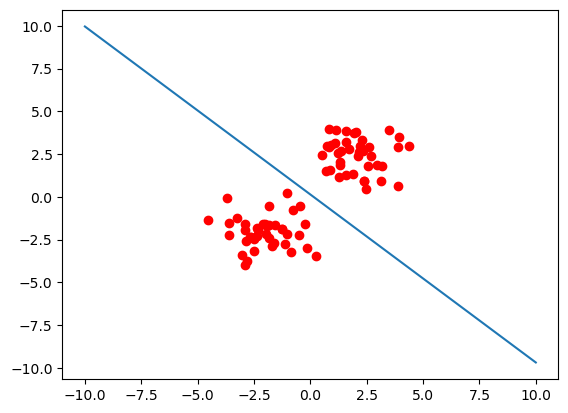

In [13]:
x0 = np.linspace(-10, 10, 100)
x1 = -(w[0] / w[1]) * x0 - (b / w[1])
plt.plot(x0, x1, label='Ligne de séparation')
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Points')

In [261]:
w , b = fit_SGD(X, Y, C=1, lr=0.2, max_iter=50)

In [262]:
y = predict(X1, w, b)

In [263]:
y

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [180]:
 w

array([-5.54406639e-05,  3.04831919e-05])

In [181]:
b

16.599999999999973

In [182]:
X1

array([[-0.23594765, -1.59984279],
       [-1.02126202,  0.2408932 ],
       [-0.13244201, -2.97727788],
       [-1.04991158, -2.15135721],
       [-2.10321885, -1.5894015 ],
       [-1.85595643, -0.54572649],
       [-1.23896227, -1.87832498],
       [-1.55613677, -1.66632567],
       [-0.50592093, -2.20515826],
       [-1.6869323 , -2.85409574],
       [-4.55298982, -1.3463814 ],
       [-1.1355638 , -2.74216502],
       [ 0.26975462, -3.45436567],
       [-1.95424148, -2.18718385],
       [-0.46722079, -0.53064123],
       [-1.84505257, -1.62183748],
       [-2.88778575, -3.98079647],
       [-2.34791215, -1.84365103],
       [-0.76970932, -0.79762015],
       [-2.38732682, -2.30230275],
       [-3.04855297, -3.42001794],
       [-3.70627019, -0.0492246 ],
       [-2.50965218, -2.4380743 ],
       [-3.25279536, -1.22250964],
       [-3.61389785, -2.21274028],
       [-2.89546656, -1.6130975 ],
       [-2.51080514, -3.18063218],
       [-2.02818223, -1.57166813],
       [-1.93348278,

6. Rewrite your SVM in a python class, with file name `SVM.py`

Just as previous lab session, you need to create a SVM class with parameters `w, b, C, lr, max_iter` as class attributes (with `self`), and methods `_loss()` and  `_derivatie_loss()` as protected methods.
Then, test your code with generated data.

In [264]:
class SVM:
    def __init__(self, C=1, lr=0.15, max_iter=500):
        self.w = None
        self.b = None
        self.C = C
        self.lr = lr
        self.max_iter = max_iter
    
    def loss(self, X, Y):
        regularizer = 0.5 * np.dot(self.w, self.w)
        liste_somme = []
        N = X.shape[0]
        
        #Calcul de la somme
        for i in range(N):
            valeur = 1 - Y[i]*(self.w.T*X[i,:]+self.b)
            liste_somme.append(valeur)
        somme = 0
        for i in range(N):
            if liste_somme[i]>0:
                somme += liste_somme[i]
                
        error_term = self.C*somme # you may need two conditions.
        loss = regularizer + error_term
        return loss
    
    def derivative_loss(self, xi, yi):
        """
        Parameters:
        ------------
        xi: (d) array, a data sample
        yi: int, lable of xi
        C: float, slackness for error term
        w:
        b:
    
        Return:
        -------------
        d_w:
        d_b:
        """
        
        d_w = self.w.T
        d_b = 0
        
        if 1 - yi * (np.dot(self.w.T,xi) + self.b) > 0:
            d_w += -self.C*yi*xi
            d_b = -self.C*yi
        
        return d_w, d_b
    
    def fit_SGD(self, X, Y):
        d = X.shape[1]
        self.w = np.ones(d)
        self.b = 1
        
        for epoch in range(max_iter):
            for xi, yi in zip(X, Y):
                d_w, d_b = self.derivative_loss(xi, yi)
    
                self.w = self.w - self.lr * d_w
                self.b = self.b - self.lr * d_b
    
        return self.w, self.b
    
    
    def predict(self, X):
        """
        Return the predicted label of all data in X
        """
        liste = []
        for xi in X:
            i = 0
            value = 1 - (np.dot(self.w.T, xi) + self.b)
            if value > 0:
                liste.append(1)
            else:
                liste.append(-1)
            i += 1
            
        return liste

In [265]:
np.random.seed(0)
svm_model = SVM(C=1, lr=0.15, max_iter=500)
y_values = svm_model.fit_SGD(X1, Y)
y_predict = svm_model.predict(X2)

In [266]:
y_predict

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1]

### B. Find Parameters by Quadratic Programming (QP)

During the course, we have learned that

A QP problem is defined as:
$
$\begin{array}{cl}\underset{x}{\operatorname{minimize}} & \frac{1}{2} x^T P x+q^T x \\ \text { subject to } & G x \leq h \\ & A x=b \\ & l b \leq x \leq u b\end{array}$
$



The Lagrangian dual problem of Soft SVM is described by:
<a name="lagrange">
$$
\begin{array}
{cl}\underset{\alpha} {\operatorname{minimize}} & \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N y_i y_j \alpha_i \alpha_j
⟨{x_i},{x_j}⟩ + \sum_{i=1}^N \alpha_i \cr
\text{subject to} \quad& \sum_{i=1}^N y_i \alpha_i =0, \quad 0 \le \alpha_i \le C, \ \forall i=1, \ldots, N
\end{array}
$$
</a>
Attention: in this equation, the variables are $\alpha$. The data $x$ are known values and are used for training process.
The dual function can be therefore rewritten as
$$
\frac{1}{2} \mathbf{𝛂 H 𝛂}^T
 + \mathbf{1}^T \cdot \mathbf{𝛂}
$$
where $\mathbf{H} = y_iy_j⟨{x_i},{x_j}⟩$

Exercise:
1. Assign the correct values to matrix $P, q, G, h, A, b, lb, ub$. Then use qpsolvers to find optimal $\mathbf{𝛂}$.

Read [the manuel of qpsovlers](https://pypi.org/project/qpsolvers/) for more utilisation of this toolbox. `qpsolvers` is not provided by Google Colab by default. If you are using Colab, you need to install it by the following command in a code block.
```
!pip install qpsolvers
```



In [267]:
import scipy.sparse as sp
from qpsolvers import solve_qp

In [292]:
# Code for matrix assignement
def solve_alpha(X, Y, C):
    n_samples = X.shape[0]
    H = np.dot(Y[:, None] * X, (Y[:, None] * X).T)
    P = H
    q = -np.ones(n_samples)
    G = np.eye(n_samples) * -1
    h = np.zeros(n_samples)
    A = Y.reshape(1, -1)
    b = np.array([0.0])
    alpha = solve_qp(P, q, G, h, A, b, lb=np.zeros(n_samples), ub=np.ones(n_samples) * C)
    return alpha

Once the values of $𝛂$ is found, you can calulate the parameters $\mathbf{w}$ and $\mathbf{b}$ in the SVM.
Calculate $\mathbf{w}$ from equation D1 in Slide 21 of Lecture 9:
$$
\mathbf{w} = \sum_{n=1}^N \alpha_n y_n \mathbf{x}_n
$$
Then, the bias $b$ is calculated by:
$$
b=(1/N)\sum_{i=1}^N(y_i-\sum_{j=1}^Na_jy_jx_j^Tx_i)
$$

2. Implement the fitting method by QP solver `fit_QP()` in your SVM class.
Then test your code with generated data. You can also integrate this method in the SVM class.

In [297]:
def fit_QP(X, Y, C):
#To complete
    alpha = solve_alpha(X, Y, C)
    
    #Calcul de w
    w = 0
    N = len(alpha)
    for i in range(N):
        w += alpha*Y[i]*X[i,:]
        
    #Pour b
    b = 0
    somme2 = 0
    for i in range(N):
        somme2 = 0
        for j in range(N):
            somme2 += alpha[j]*Y[j]*X[j,:].T*X[i,:]
        b += Y[i] - somme2
    b = b/N
    
    return w, b

3. Again, plot the fitted hyperplane with the data, with learned `w` and `b`.

In [298]:
w , b = fit_QP(X, Y, C=1)
x0 = np.linspace(-10, 10, 100)
x1 = -(w[0] / w[1]) * x0 - (b / w[1])
plt.plot(x0, x1, label='Ligne de séparation')

TypeError: list indices must be integers or slices, not tuple

## C. SVM with RBF kernel (Optional)

As explained in the lecture, you can implement kernel function to transform the data points into a highier dimentional space, to make the non-separable data separable (linearly). The transformation is simple. Instead of calculating the inner product ($k(x_i,x_j)=⟨{x_i},{x_j}⟩$) in [the Lagrange Dual function](#lagrange), you should apply a transformation
$$
k(x_i,x_j) = exp(\gamma ||x_i-x_j||^2)
$$
where $exp(⋅)$ is an exponential function, $\gamma$ a hyperparameter defined by the user, and $||⋅||^2$ the L2 norm.


In [ ]:
def RBF(X, gamma):

Test your code with ensercled data samples, generated as follows.

In [276]:
import pandas as pd
from sklearn.datasets import make_circles
X_circle, y_circle = make_circles(n_samples=500, noise=0.06, random_state=42)
df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))
colors = {0:'blue', 1:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

ValueError: All arrays must be of the same length